In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
print('done copying')

done copying


In [2]:
path = r'C:\Users\User\Desktop\work\fruits\fruits-360_dataset\fruits-360\Training'

In [3]:
for types in os.listdir(path):
    print(types)

Apple Braeburn
Apple Crimson Snow
Apple Golden 1
Apple Golden 2
Apple Golden 3
Apple Granny Smith
Apple Pink Lady
Apple Red 1
Apple Red 2
Apple Red 3
Apple Red Delicious
Apple Red Yellow 1
Apple Red Yellow 2
Apricot
Avocado
Avocado ripe
Banana
Banana Lady Finger
Banana Red
Beetroot
Blueberry
Cactus fruit
Cantaloupe 1
Cantaloupe 2
Carambula
Cauliflower
Cherry 1
Cherry 2
Cherry Rainier
Cherry Wax Black
Cherry Wax Red
Cherry Wax Yellow
Chestnut
Clementine
Cocos
Corn
Corn Husk
Cucumber Ripe
Cucumber Ripe 2
Dates
Eggplant
Fig
Ginger Root
Granadilla
Grape Blue
Grape Pink
Grape White
Grape White 2
Grape White 3
Grape White 4
Grapefruit Pink
Grapefruit White
Guava
Hazelnut
Huckleberry
Kaki
Kiwi
Kohlrabi
Kumquats
Lemon
Lemon Meyer
Limes
Lychee
Mandarine
Mango
Mango Red
Mangostan
Maracuja
Melon Piel de Sapo
Mulberry
Nectarine
Nectarine Flat
Nut Forest
Nut Pecan
Onion Red
Onion Red Peeled
Onion White
Orange
Papaya
Passion Fruit
Peach
Peach 2
Peach Flat
Pear
Pear 2
Pear Abate
Pear Forelle
Pear Kai

In [4]:
# For checking out that how many images are available in the train set we can use import OS
path = r'C:\Users\User\Desktop\work\fruits\fruits-360_dataset\fruits-360\Training'
for types in os.listdir(path):
    print(str(len(os.listdir(path+"\\" +types)))+" "+ types+ ' images')

492 Apple Braeburn images
444 Apple Crimson Snow images
480 Apple Golden 1 images
492 Apple Golden 2 images
481 Apple Golden 3 images
492 Apple Granny Smith images
456 Apple Pink Lady images
492 Apple Red 1 images
492 Apple Red 2 images
429 Apple Red 3 images
490 Apple Red Delicious images
492 Apple Red Yellow 1 images
672 Apple Red Yellow 2 images
492 Apricot images
427 Avocado images
491 Avocado ripe images
490 Banana images
450 Banana Lady Finger images
490 Banana Red images
450 Beetroot images
462 Blueberry images
490 Cactus fruit images
492 Cantaloupe 1 images
492 Cantaloupe 2 images
490 Carambula images
702 Cauliflower images
492 Cherry 1 images
738 Cherry 2 images
738 Cherry Rainier images
492 Cherry Wax Black images
492 Cherry Wax Red images
492 Cherry Wax Yellow images
450 Chestnut images
490 Clementine images
490 Cocos images
450 Corn images
462 Corn Husk images
392 Cucumber Ripe images
468 Cucumber Ripe 2 images
490 Dates images
468 Eggplant images
702 Fig images
297 Ginger 

In [5]:
train_directory = r'C:\Users\User\Desktop\work\fruits\fruits-360_dataset\fruits-360\Training'
#test_directory = r'C:\Users\User\Desktop\work\plant_disease\Auto-Chloro-A-Crop-Disease-Classifier-and-Remedies-Provider-In-Bangla-main\My Drive\test_data'

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [15]:
train_generator = train_datagen.flow_from_directory(
train_directory,      
target_size=(100,100), 
color_mode='rgb',      
batch_size=8, 
class_mode='categorical',    
subset='training',
shuffle=True,   
seed=42)
validation_generator = train_datagen.flow_from_directory(train_directory,
target_size=(100,100), 
color_mode='rgb', 
batch_size=8, 
class_mode='categorical', 
subset='validation', 
shuffle=False)

Found 54190 images belonging to 131 classes.
Found 13502 images belonging to 131 classes.


In [18]:
detection=Sequential()
#1 -convolutional layer-1
detection.add(Conv2D(256,(3,3),padding='same',input_shape=(256,256,3)))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(MaxPooling2D(pool_size=(2,2)))
detection.add(Dropout(0.25))
#2 -convolutional layer-2
detection.add(Conv2D(256,(3,3),padding='same'))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(MaxPooling2D(pool_size=(2,2)))
detection.add(Dropout(0.25))
#3 -convolutional layer-3
detection.add(Conv2D(512,(3,3),padding='same'))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(MaxPooling2D(pool_size=(2,2)))
detection.add(Dropout(0.45))
#4 -convolutional layer-4
detection.add(Conv2D(512,(3,3),padding='same'))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(MaxPooling2D(pool_size=(2,2)))
detection.add(Dropout(0.45))
#layer6
detection.add(Dense(512))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(Dropout(0.25))
#layer 5
detection.add(Flatten())
detection.add(Dense(128))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(Dropout(0.25))
#output layer
detection.add(Dense(131,activation='softmax'))
optimum=Adam(learning_rate=0.001)
detection.compile(optimizer=optimum,loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
print(detection.summary())     

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 100, 100, 256)     7168      
                                                                 
 batch_normalization_10 (Bat  (None, 100, 100, 256)    1024      
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 100, 100, 256)     0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 50, 50, 256)      0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 50, 50, 256)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 50, 50, 512)      

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=5,monitor='loss',restore_best_weights=True)

In [21]:
ephocs=15
steps_per_epoch=train_generator.n//train_generator.batch_size
steps_per_epoch

6773

In [22]:
validation_steps=validation_generator.n//validation_generator.batch_size
validation_steps

1687

In [23]:
model=detection.fit(x=train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=ephocs,
                    validation_data=validation_generator,
                    validation_steps=validation_steps,
                    callbacks=[es])

detection.save('fruits.h5')

Epoch 1/15
6773/6773 [==============================] - 711s 105ms/step - loss: 0.7035 - accuracy: 0.8203 - val_loss: 0.2356 - val_accuracy: 0.9289
Epoch 2/15
6773/6773 [==============================] - 691s 102ms/step - loss: 0.1181 - accuracy: 0.9621 - val_loss: 0.1272 - val_accuracy: 0.9722
Epoch 3/15
6773/6773 [==============================] - 691s 102ms/step - loss: 0.0713 - accuracy: 0.9773 - val_loss: 0.2229 - val_accuracy: 0.9607
Epoch 4/15
6773/6773 [==============================] - 696s 103ms/step - loss: 0.0543 - accuracy: 0.9823 - val_loss: 0.1388 - val_accuracy: 0.9618
Epoch 5/15
6773/6773 [==============================] - 694s 102ms/step - loss: 0.0443 - accuracy: 0.9862 - val_loss: 0.1249 - val_accuracy: 0.9666
Epoch 6/15
6773/6773 [==============================] - 689s 102ms/step - loss: 0.0375 - accuracy: 0.9877 - val_loss: 0.1577 - val_accuracy: 0.9706
Epoch 7/15
 488/6773 [=>............................] - ETA: 9:47 - loss: 0.0321 - accuracy: 0.9892

KeyboardInterrupt: 

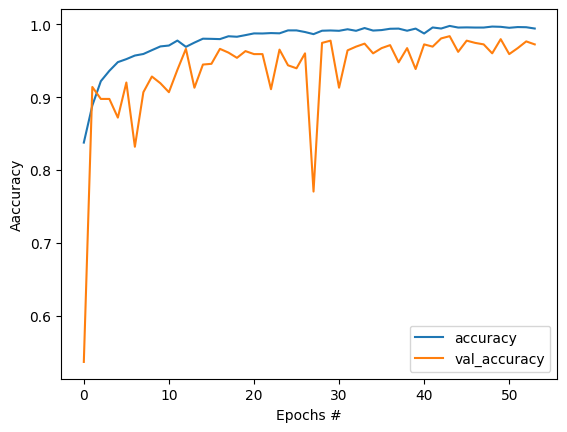

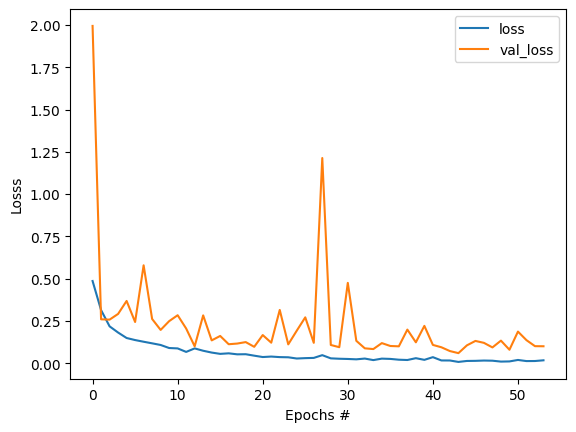

In [24]:
# Plotting
hist = model.history
def show_plt(type):
    if type == 1:
        plt.plot(hist["accuracy"], label="accuracy")
        plt.plot(hist["val_accuracy"], label="val_accuracy")
        plt.ylabel("Aaccuracy")
        plt.xlabel("Epochs #")
        plt.legend()
        plt.show()
    else:
        plt.plot(hist["loss"], label="loss")
        plt.plot(hist["val_loss"], label="val_loss")
        plt.ylabel("Losss")
        plt.xlabel("Epochs #")
        plt.legend()
        plt.show()
        
show_plt(1)
show_plt(0)

1/1 [==============================] - 0s 192ms/step


'Tomato_Late_blight'

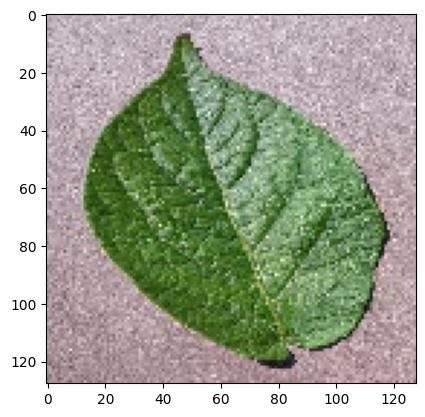

In [29]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
detection = load_model('plants.h5')
import numpy as np 
path = r'C:\Users\User\Desktop\work\plant_disease\Auto-Chloro-A-Crop-Disease-Classifier-and-Remedies-Provider-In-Bangla-main'
test_img=image.load_img(path+"\\"+"ph.JPG",target_size=(128,128,3),color_mode='rgb')
plt.imshow(test_img)
test_img=image.img_to_array(test_img)
test_img=np.expand_dims(test_img,axis=0)

result=detection.predict(test_img)
a=result.argmax()
classes=train_generator.class_indices
category=[]
for i in classes:
          category.append(i)
for i in range(len(classes)):
           if(i==a):
                output=category[i]
output  